TIFF (1435, 1054) L


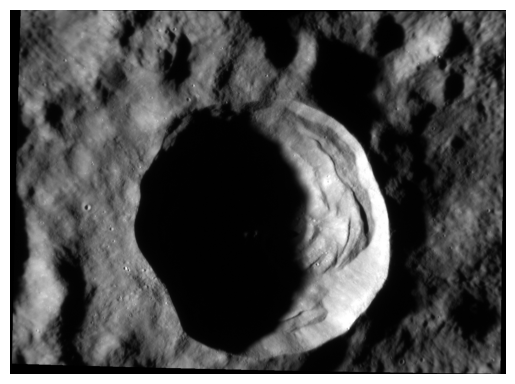

In [4]:
import cv2
import ipynb
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from PIL import Image, ImageFilter, ImageOps
import numpy as np

im = cv2.imread('D:\MJCJ research\Edge_detection\Test_images\PIA19202_crater_26m_px.tif',1)
img = Image.open('D:\MJCJ research\Edge_detection\Test_images\PIA19202_crater_26m_px.tif')
plt.imshow(im)
plt.axis('off')

# Image attributes: format, width & length, "L" is greyscale 
print(img.format, img.size, img.mode)

In [4]:
# Contrast stretching 
# https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20162017/LectureNotes/IP/PointOperators/ImageStretching.html
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm
# https://java2blog.com/cv2-canny-python/
# https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html
# https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/
# https://www.geeksforgeeks.org/histogram-plotting-and-stretching-in-python-without-using-inbuilt-function/

In [5]:
%run Contrast_stretching_L_to_RGB.ipynb
filepath = "D:\MJCJ research\Edge_detection\Test_images\PIA19202_crater_26m_px.tif"
Contrast_stretching_L_to_RGB(filepath)

In [11]:
#%run Contrast_stretching_L.ipynb
#image = cv2.imread(filepath)
#Contrast_stretching_L(image)

In [ ]:
# Contrast and exposure
# https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html

from skimage import exposure
from skimage import data


im.min(), im.max()

# Image is already using the whole value range (0,255)
# Try clipping pixel values using percentiles of the image to improve contrast
# Pixel saturation leads to information loss using this technique

v_max = []
v_min = []
for i in range (0,6):
    v_min_temp, v_max_temp = np.percentile(im, (0 + i*5, 90 - i*5))
    v_max.append(v_max_temp), v_min.append(v_min_temp)

total_images = 6
images = []
for j in range (total_images):
    image =  exposure.rescale_intensity(im, in_range=(v_min[j], v_max[j]))
    images.append(image)



for i in range(1, 7):
    plt.subplot(2, 3, i)

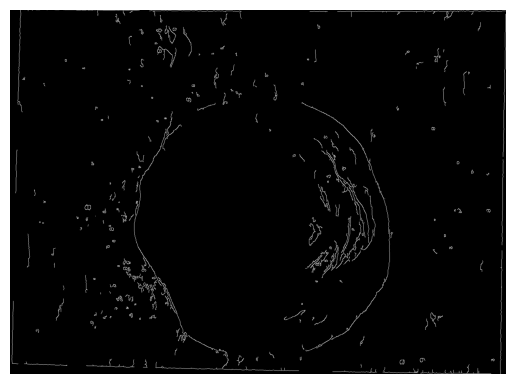

In [37]:
# Apply Canny
edges = cv2.Canny(im, 50, 150, 2, L2gradient = True)
edges2 = cv2.Canny(im, 50, 150, 2, L2gradient = True)

fig = plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.imsave('edges.tif', edges, cmap='gray', format='tiff')


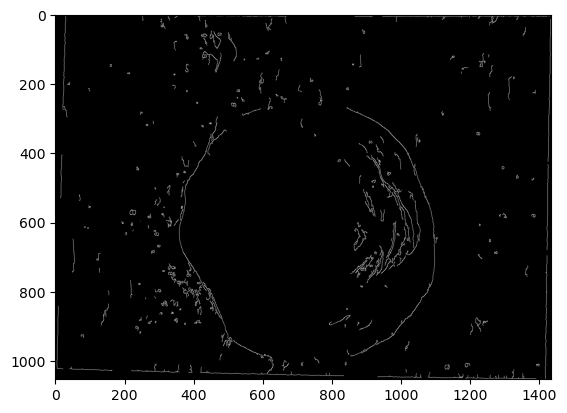

In [35]:
plt.imshow(edges2, cmap='gray')

In [ ]:
#Try filters for better outcome

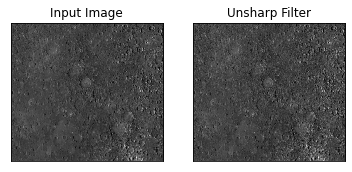

In [16]:
# Unsharp filter: enhance edges... and noise

image = Image.fromarray(img.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=4, percent=150))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.imsave('edges_unsharp.tif', edges, cmap='gray', format='tiff')
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Conservative filter: remove slat and pepper noise, uses min and max intensity within pixel neighbourhood, preserves edges, no effect on speckle noise

In [10]:
# first a conservative filter for grayscale images will be defined.

def conservative_smoothing_gray(data, filter_size):
    
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

In [13]:
new_image = conservative_smoothing_gray(img,3)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

ValueError: too many values to unpack (expected 2)